In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv')
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.20,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023
3,4,Innovate Industries,Email,Women 25-34,45 days,Instagram,4.496375,7420,60.92,Seattle,Spanish,2388,58251,6,Foodies,01-01-2023
4,5,Data Tech Solutions,Influencer,Men 25-34,30 days,Google Ads,4.405930,2146,138.82,Chicago,English,1025,34407,5,Tech Enthusiasts,01-01-2023


In [3]:
df.shape

(22029, 16)

In [4]:
df.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       22029 non-null  int64  
 1   Company           22029 non-null  object 
 2   Campaign_Type     22029 non-null  object 
 3   Target_Audience   22029 non-null  object 
 4   Duration          22029 non-null  object 
 5   Channel_Used      22029 non-null  object 
 6   Conversion_Rate   22029 non-null  float64
 7   Acquisition_Cost  22029 non-null  int64  
 8   ROI               22029 non-null  float64
 9   Location          22029 non-null  object 
 10  Language          22029 non-null  object 
 11  Clicks            22029 non-null  int64  
 12  Impressions       22029 non-null  int64  
 13  Engagement_Score  22029 non-null  int64  
 14  Customer_Segment  22029 non-null  object 
 15  Date              22029 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

In [6]:
df.describe()

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000
mean,11015.000000,4.757232,5522.740842,182.863648,2223.807572,50610.402787,6.582323
std,6359.368876,0.960393,2597.666260,301.619721,1394.166380,28542.979123,1.458804
min,1.000000,2.015723,1000.000000,-98.300000,30.000000,1001.000000,4.000000
25%,5508.000000,4.130705,3286.000000,-4.080000,1067.000000,25804.000000,5.000000
50%,11015.000000,4.761527,5525.000000,93.650000,2088.000000,50858.000000,7.000000
75%,16522.000000,5.429335,7766.000000,247.310000,3212.000000,75165.000000,8.000000
max,22029.000000,7.469907,9999.000000,3109.790000,6887.000000,99999.000000,9.000000


## **Data Exploration**

In [7]:
df.Campaign_ID.unique()

array([    1,     2,     3, ..., 22027, 22028, 22029])

In [8]:
df.Location.nunique()

10

In [9]:
df.Customer_Segment.nunique()

5

In [10]:
df.Campaign_Type.value_counts()

,count
Campaign_Type,
Display,4450
Search,4441
Social Media,4412
Email,4388
Influencer,4338


In [11]:
df.Channel_Used.value_counts()

,count
Channel_Used,
Facebook,3742
Google Ads,3694
Website,3688
Instagram,3649
YouTube,3632
Email,3624


## **Exploratory Data Analysis (EDA) and Visualization**

# scatter plot to visualize the relationship between Acquisition_Cost and ROI

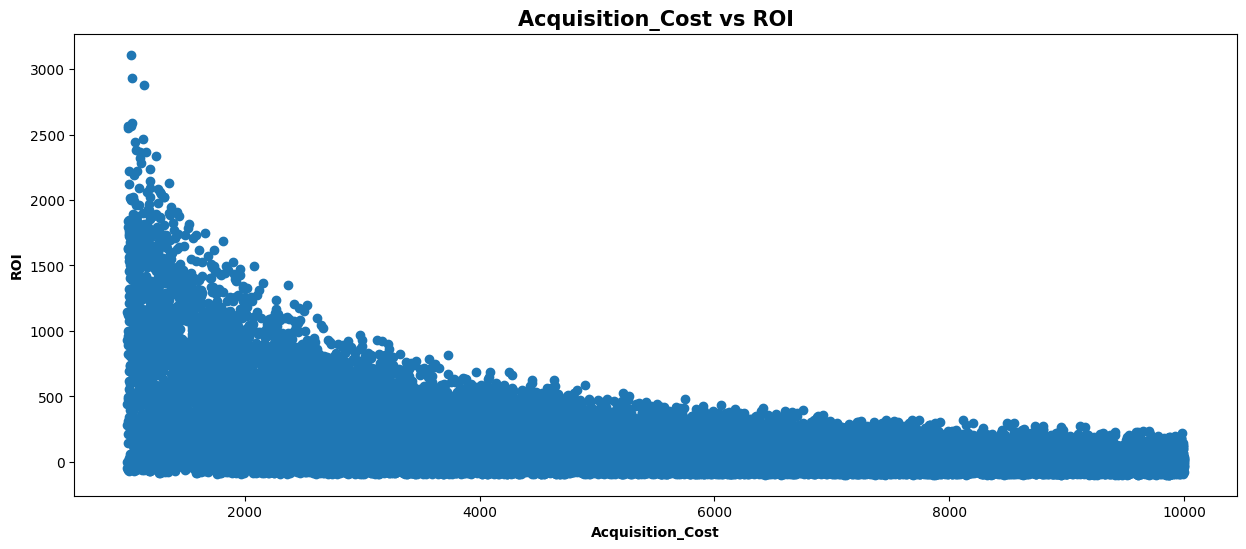

In [12]:
plt.figure(figsize=(15,6))
plt.scatter(x= df.Acquisition_Cost, y= df.ROI)
plt.xlabel('Acquisition_Cost', fontsize= 10, fontweight= 'bold')
plt.ylabel('ROI', fontsize= 10, fontweight= 'bold')
plt.title('Acquisition_Cost vs ROI', fontsize= 15, fontweight= 'bold')
plt.show()

In [13]:
Campaign_Type = df.Campaign_Type.value_counts()
Campaign_Type

,count
Campaign_Type,
Display,4450
Search,4441
Social Media,4412
Email,4388
Influencer,4338


In [14]:
avg_conversion_rate = df.groupby(['Channel_Used'])['Conversion_Rate',].mean()
avg_conversion_rate

,Conversion_Rate
Channel_Used,
Email,4.730072
Facebook,4.778638
Google Ads,4.749748
Instagram,4.756817
Website,4.772624
YouTube,4.754677


# bar chart to visualize the average Conversion_Rate for different Channel_Used, categorized by Campaign_Type

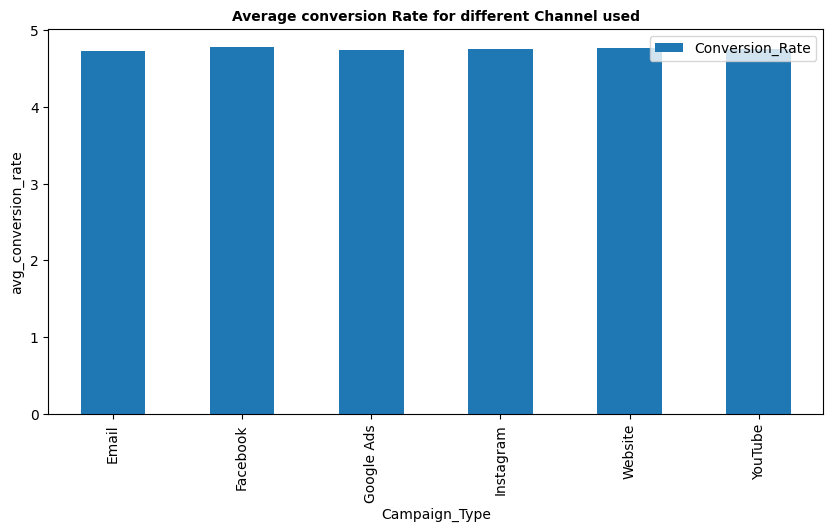

In [15]:
avg_conversion_rate.plot(kind= 'bar', figsize= (10,5))

plt.title('Average conversion Rate for different Channel used', fontsize= 10, fontweight= 'bold')
plt.xlabel('Campaign_Type')
plt.ylabel('avg_conversion_rate')
plt.show()

# the distribution of Engagement_Score across different Campaign_Type using a box plot

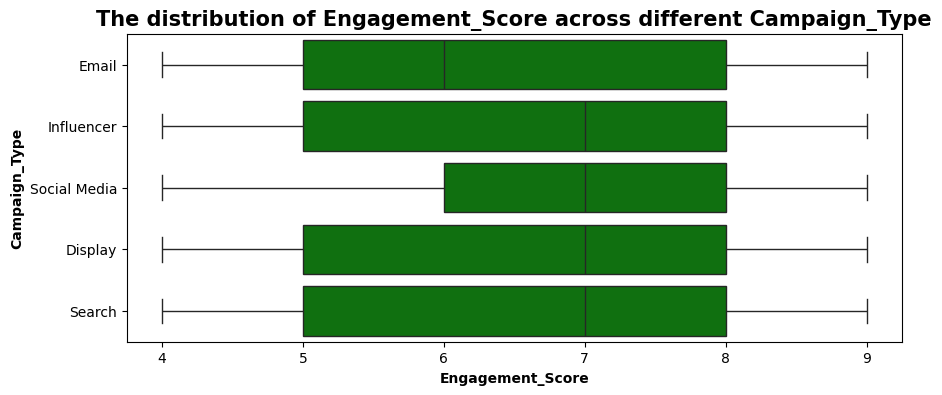

In [16]:
plt.figure(figsize= (10,4))
sns.boxplot(x= df['Engagement_Score'], y= df['Campaign_Type'], color= 'green')
plt.xlabel('Engagement_Score', fontsize= 10, fontweight= 'bold')
plt.ylabel('Campaign_Type', fontsize= 10, fontweight= 'bold')
plt.title('The distribution of Engagement_Score across different Campaign_Type', fontsize= 15, fontweight= 'bold')
plt.show()

# the average ROI by Company using a bar chart to compare the profitability of campaigns conducted by different companies

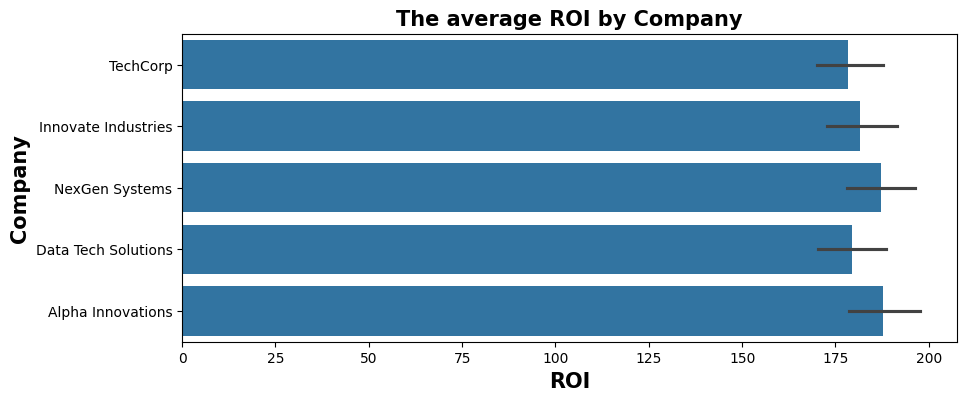

In [17]:
plt.figure(figsize= (10,4))
sns.barplot(x= 'ROI', y= 'Company', data= df)
plt.xlabel('ROI', fontsize= 15, fontweight= 'bold')
plt.ylabel('Company', fontsize= 15, fontweight= 'bold')
plt.title('The average ROI by Company', fontsize= 15, fontweight= 'bold')
plt.show()

# the correlation between Engagement_Score and Conversion_Rate using a heatmap

In [18]:
correlation_matrix = df[['Engagement_Score', 'Conversion_Rate']].corr()
correlation_matrix

,Engagement_Score,Conversion_Rate
Engagement_Score,1.000000,0.010546
Conversion_Rate,0.010546,1.000000


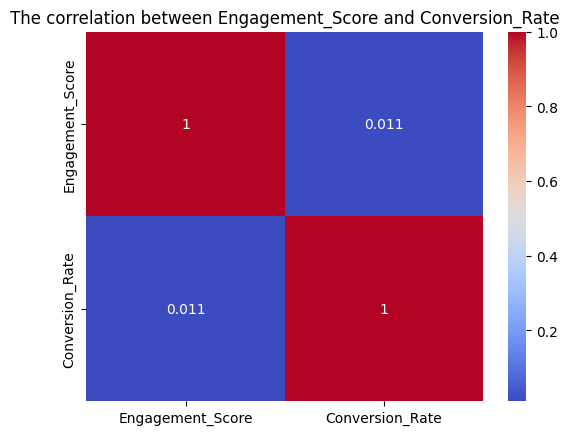

In [19]:
sns.heatmap(correlation_matrix, annot= True, cmap= 'coolwarm')
plt.title('The correlation between Engagement_Score and Conversion_Rate')
plt.show()

## **Customer Segmentation**

# count plot to visualize the distribution of Target_Audience

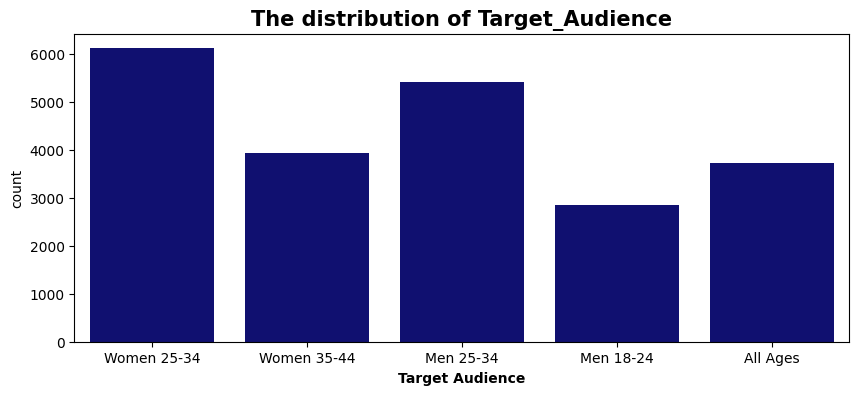

In [20]:
plt.figure(figsize= (10,4))
sns.countplot(x= 'Target_Audience', data= df, color= 'navy')
plt.title('The distribution of Target_Audience', fontsize= 15, fontweight= 'bold')
plt.xlabel('Target Audience', fontsize= 10, fontweight= 'bold')
plt.show()

# Customer_Segment has the highest Conversion_Rate for each Language using a bar chart

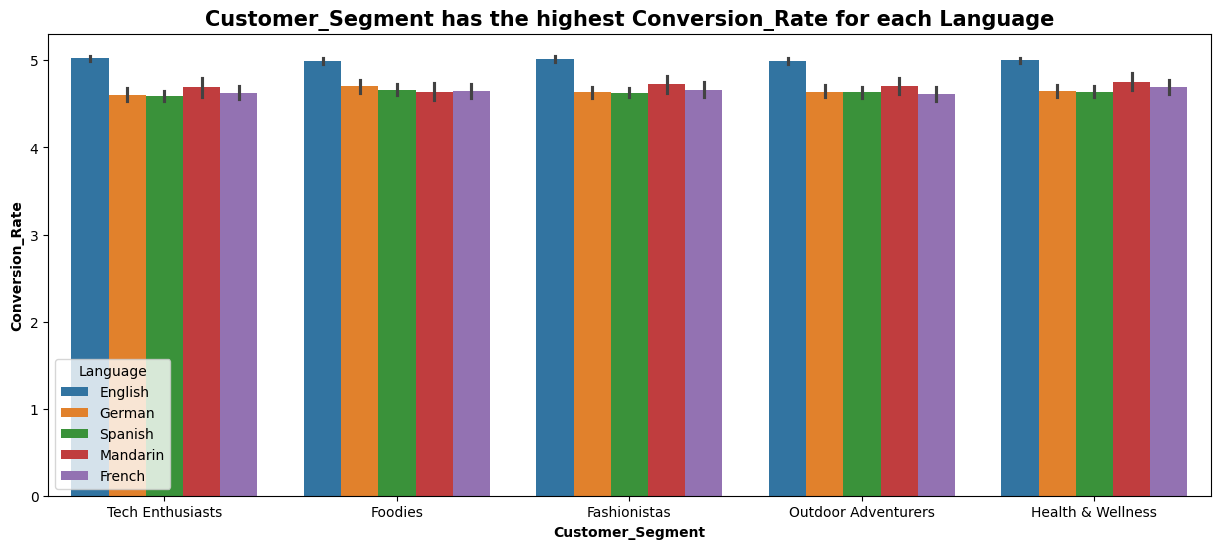

In [21]:
plt.figure(figsize= (15,6))
sns.barplot(x= 'Customer_Segment', y= 'Conversion_Rate', hue= 'Language', data= df)
plt.title('Customer_Segment has the highest Conversion_Rate for each Language', fontsize= 15, fontweight= 'bold')
plt.xlabel('Customer_Segment', fontsize= 10, fontweight= 'bold')
plt.ylabel('Conversion_Rate',fontsize= 10, fontweight= 'bold')
plt.show()

# the distribution of Acquisition_Cost across each Customer_Segment,categorized by Channel_Used, using a box plot

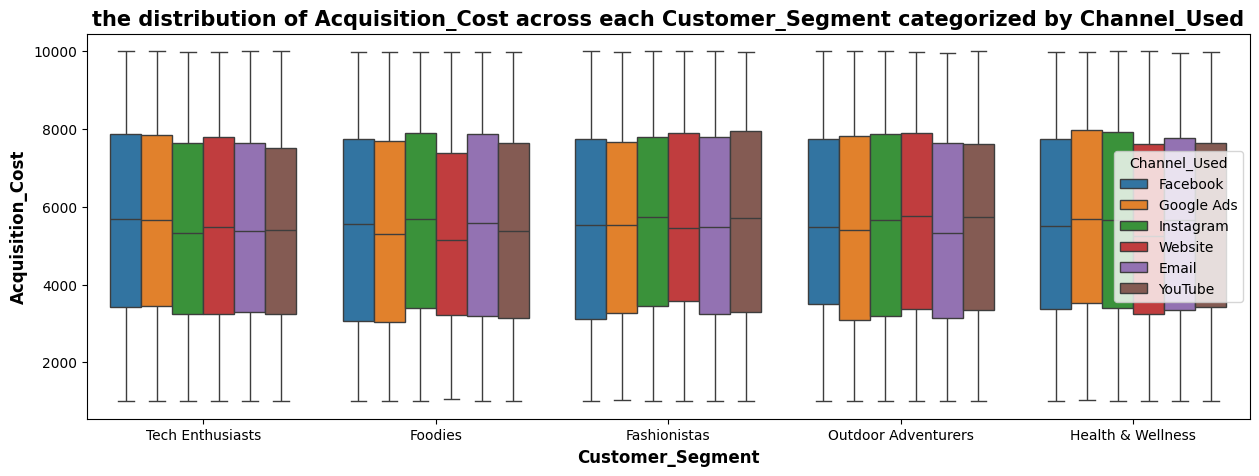

In [22]:
plt.figure(figsize= (15,5))
sns.boxplot(x= 'Customer_Segment', y= 'Acquisition_Cost', hue= 'Channel_Used', data= df)
plt.title('the distribution of Acquisition_Cost across each Customer_Segment categorized by Channel_Used', fontsize= 15, fontweight= 'bold')
plt.xlabel('Customer_Segment', fontsize= 12, fontweight= 'bold')
plt.ylabel('Acquisition_Cost', fontsize= 12, fontweight= 'bold')
plt.show()

# average Conversion_Rate by Language using a bar chart to compare the effectiveness of campaigns conducted in different languages

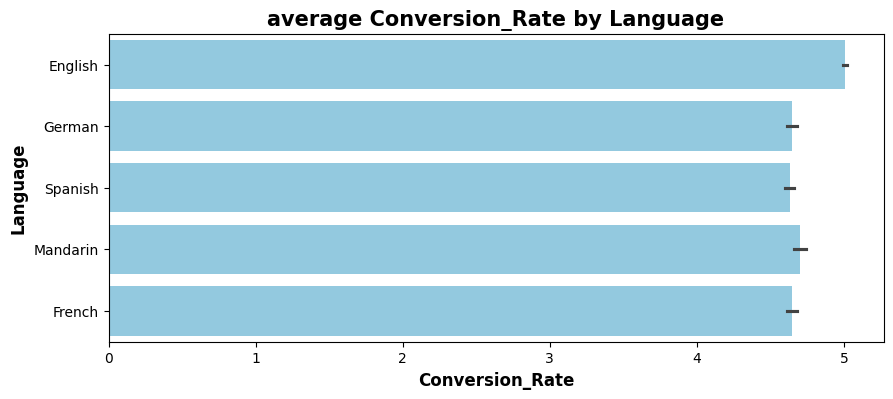

In [23]:
plt.figure(figsize= (10,4))
sns.barplot(x= 'Conversion_Rate', y= 'Language', data= df, estimator= 'mean' , color= 'skyblue')
plt.title('average Conversion_Rate by Language', fontsize= 15, fontweight= 'bold')
plt.xlabel('Conversion_Rate', fontsize= 12, fontweight= 'bold')
plt.ylabel('Language', fontsize= 12, fontweight= 'bold')
plt.show()

## **Channel Effectiveness**

# the Engagement_Score for different Channels_Used, segmented by Campaign_Type, using a bar chart

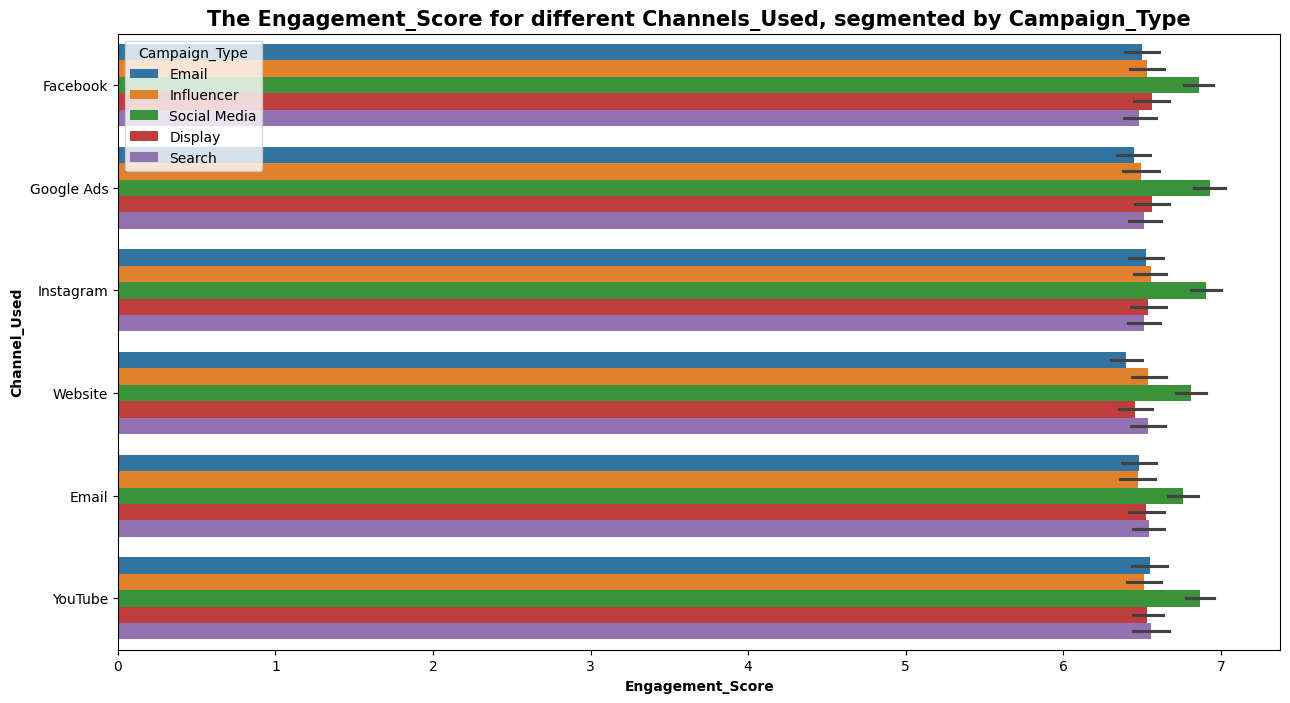

In [24]:
plt.figure(figsize= (15,8))
sns.barplot(x='Engagement_Score', y='Channel_Used', hue='Campaign_Type', data= df)
plt.title('The Engagement_Score for different Channels_Used, segmented by Campaign_Type', fontsize= 15, fontweight= 'bold')
plt.xlabel('Engagement_Score', fontsize= 10, fontweight= 'bold')
plt.ylabel('Channel_Used', fontsize= 10, fontweight= 'bold')
plt.show()

# the distribution of total ROI across different Channels_Used using a pie chart

In [25]:
total_ROI_by_channel= df.groupby('Channel_Used')['ROI'].sum()

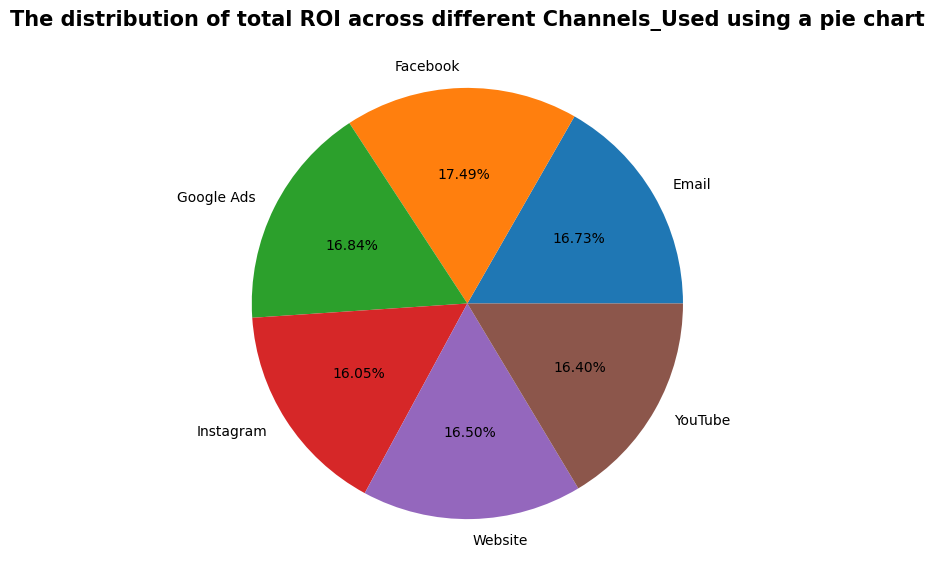

In [26]:
plt.figure(figsize= (10,7))
plt.title('The distribution of total ROI across different Channels_Used using a pie chart', fontsize= 15, fontweight= 'bold')
plt.pie(total_ROI_by_channel, labels= total_ROI_by_channel.index, autopct= '%1.2f%%')
plt.show()

# to show the relationship between Clicks and Impressions for each Channel_Used

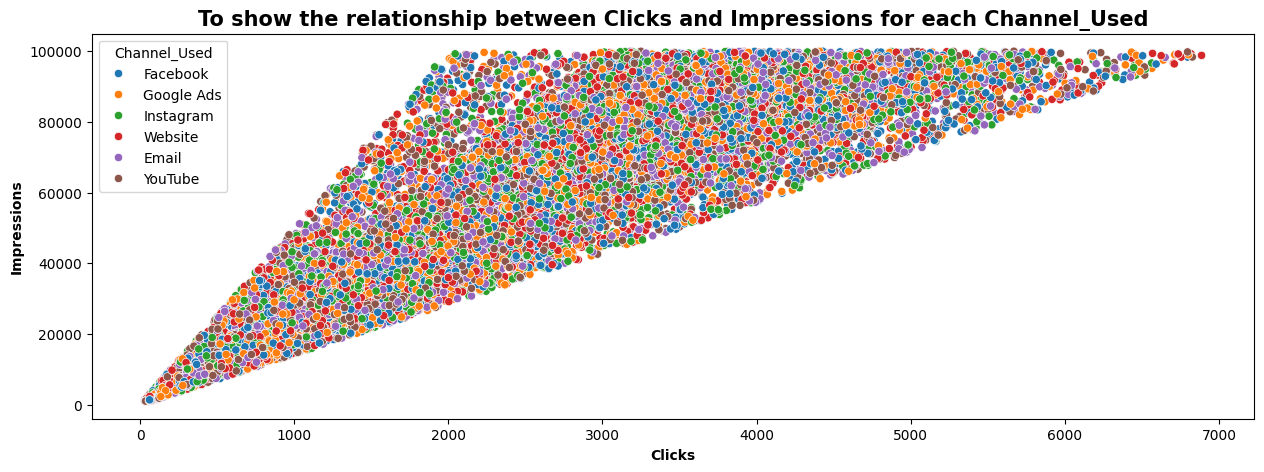

In [27]:
plt.figure(figsize= (15,5))
plt.title('To show the relationship between Clicks and Impressions for each Channel_Used', fontsize= 15, fontweight= 'bold')
sns.scatterplot(x= 'Clicks', y= 'Impressions', hue= 'Channel_Used', data=df)
plt.xlabel('Clicks', fontsize= 10, fontweight= 'bold')
plt.ylabel('Impressions', fontsize= 10, fontweight= 'bold')
plt.show()

##**TIME BASED ANALYSIS**

# the distribution of Duration using a histogram

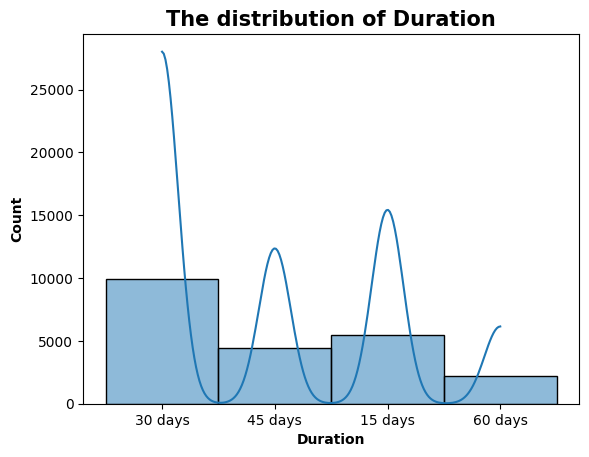

In [28]:
plt.title('The distribution of Duration', fontsize= 15, fontweight= 'bold')
plt.xlabel('Duration', fontsize= 10, fontweight= 'bold')
plt.ylabel('Count', fontsize= 10, fontweight= 'bold')
sns.histplot(df['Duration'], kde= True)
plt.show()

# the overall Conversion_Rate has changed over Date for each Company using a line chart

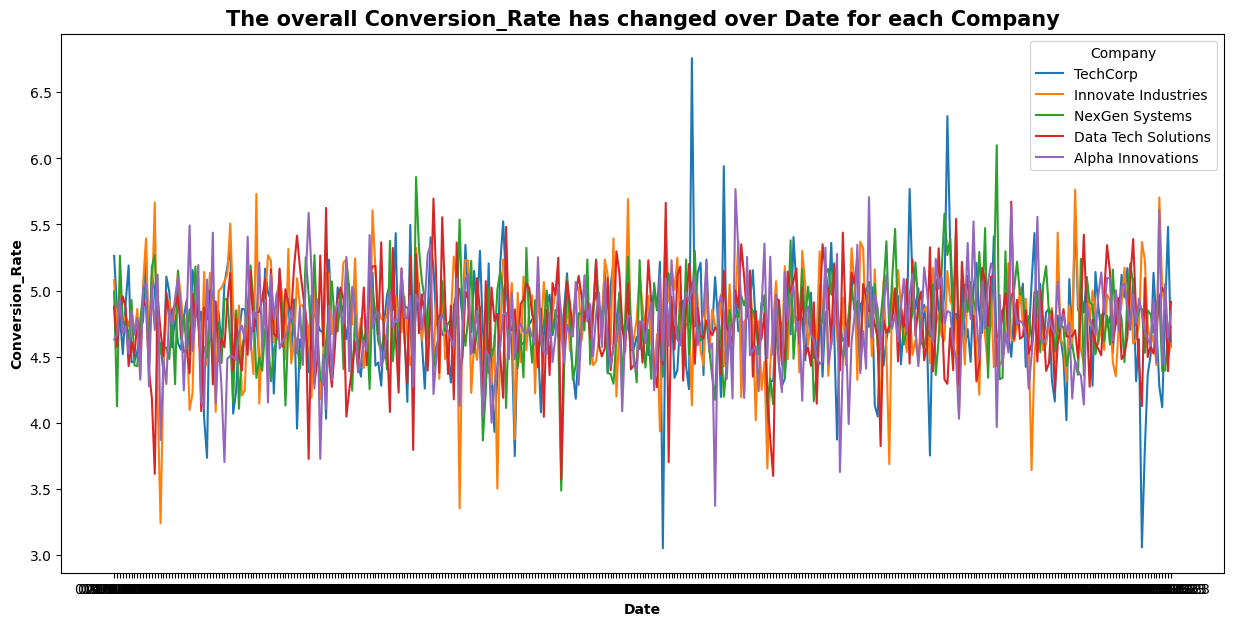

In [34]:
plt.figure(figsize= (15,7))
sns.lineplot(x='Date', y='Conversion_Rate', hue='Company', errorbar= None, data=df)
plt.title('The overall Conversion_Rate has changed over Date for each Company', fontsize= 15, fontweight= 'bold')
plt.xlabel('Date', fontsize= 10, fontweight= 'bold')
plt.ylabel('Conversion_Rate', fontsize= 10, fontweight= 'bold')
plt.show()

# the trend of Engagement_Score over Date with a line chart

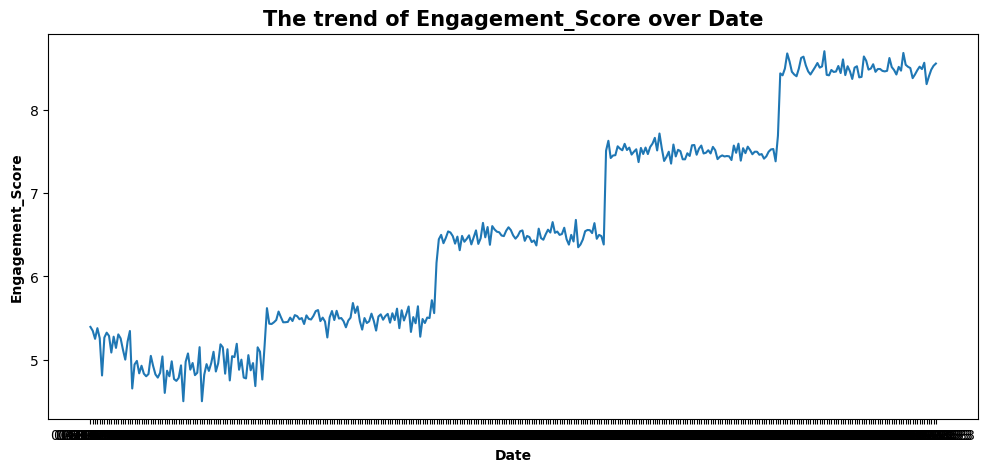

In [40]:
plt.figure(figsize= (12,5))
sns.lineplot(x= 'Date', y= 'Engagement_Score', data= df, errorbar= None)
plt.title('The trend of Engagement_Score over Date', fontsize= 15, fontweight= 'bold')
plt.xlabel('Date', fontsize= 10, fontweight= 'bold')
plt.ylabel('Engagement_Score', fontsize= 10, fontweight= 'bold')
plt.show()

## **Geographic Analysis**

# location has the highest Acquisition_Cost using a bar chart

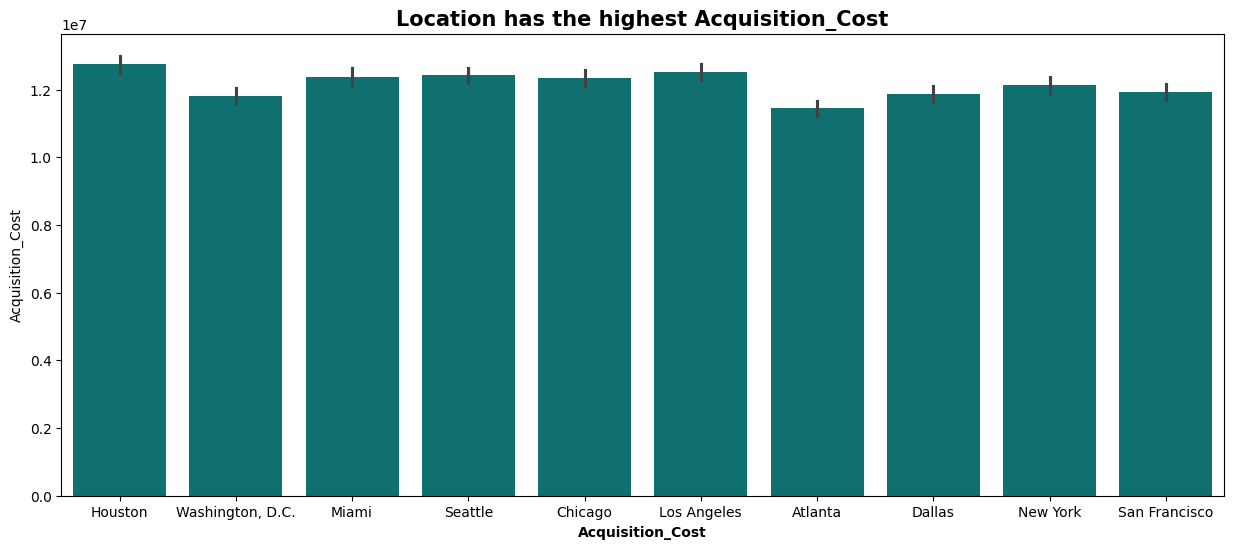

In [44]:
plt.figure(figsize= (15,6))
sns.barplot(x= 'Location', y= 'Acquisition_Cost', data= df, estimator= 'sum', color= 'Teal')
plt.title('Location has the highest Acquisition_Cost', fontsize= 15, fontweight= 'bold')
plt.xlabel('Location', fontsize= 10, fontweight= 'bold')
plt.xlabel('Acquisition_Cost', fontsize= 10, fontweight= 'bold')
plt.show()

# the Conversion_Rate by different Location, categorized by Target_Audience using a bar chart

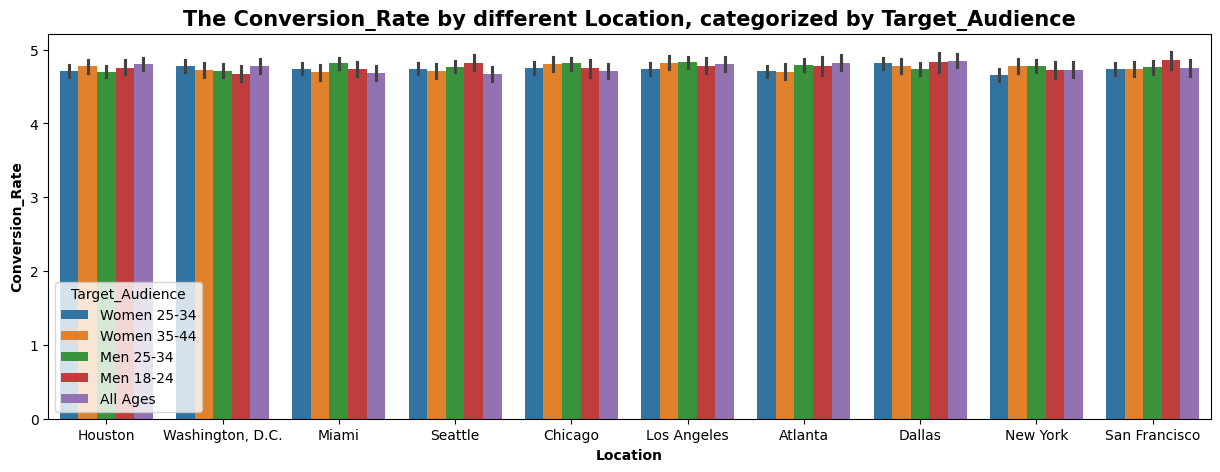

In [47]:
plt.figure(figsize= (15,5))
sns.barplot(x= 'Location', y= 'Conversion_Rate', hue= 'Target_Audience', data=df)
plt.title('The Conversion_Rate by different Location, categorized by Target_Audience', fontsize= 15, fontweight= 'bold')
plt.xlabel('Location', fontsize= 10, fontweight= 'bold')
plt.ylabel('Conversion_Rate', fontsize= 10, fontweight= 'bold')
plt.show()

#The proportion of ROI by Location using a pie chart

In [49]:
proportion_of_ROI_by_Location = df.groupby('Location')['ROI'].sum()

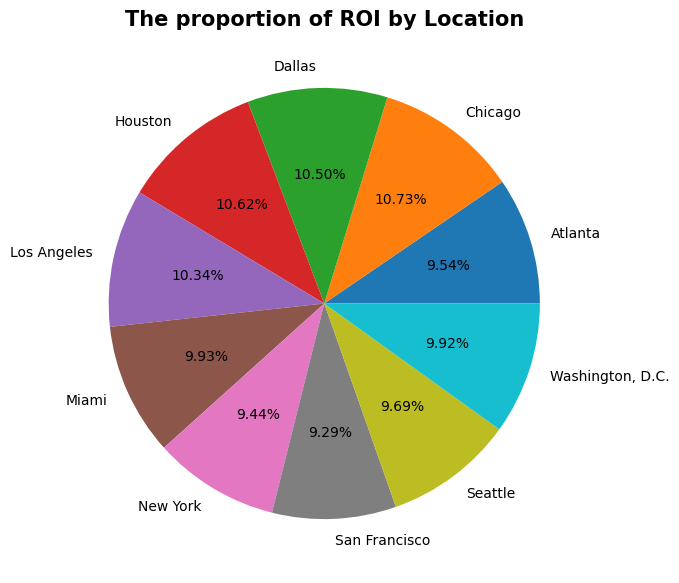

In [51]:
plt.figure(figsize= (10,7))
plt.title('The proportion of ROI by Location', fontsize= 15, fontweight= 'bold')
plt.pie(proportion_of_ROI_by_Location , labels= proportion_of_ROI_by_Location.index, autopct= '%1.2f%%')
plt.show()